In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np

In [2]:
# Загрузка библиотек для графиков
import seaborn as sns
from matplotlib import pyplot as plt

# Режим отображения -> SVG
%config InlineBackend.figure_format = 'svg'

In [3]:
# Заугрзка таблицы
df = pd.read_excel('connected.xlsx')
df.head()

,Zeta potential (mV),Concentration μM,Viability (%),Animal,Is inorganic,Diameter (nm),Cell line (L)/primary cells (P),Nanoparticle
0,-8.0,0.002478,100.00000,rat,1,20.3,L,CeO2
1,-8.0,0.004956,100.00000,rat,1,20.3,L,CeO2
2,-8.0,0.009911,100.00000,rat,1,20.3,L,CeO2
3,-8.0,0.019823,100.00000,rat,1,20.3,L,CeO2
4,-8.0,0.039645,97.53237,rat,1,20.3,L,CeO2


<AxesSubplot:xlabel='Is inorganic', ylabel='Viability (%)'>

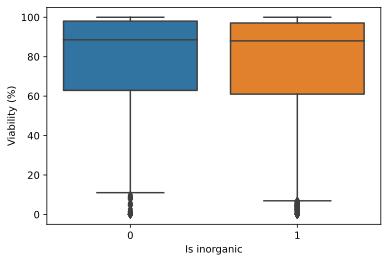

In [4]:
# Посмотрим, как влияет органичность НЧ на клетку
sns.boxplot(data=df, x='Is inorganic', y='Viability (%)')

In [5]:
# Как видим, для клетки не важно, органическая ли НЧ или нет.

<AxesSubplot:xlabel='Zeta potential (mV)', ylabel='Viability (%)'>

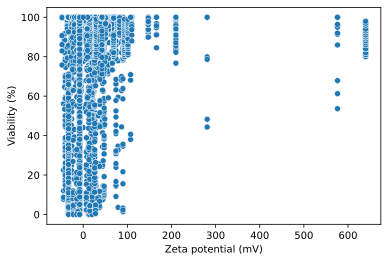

In [6]:
# Как дзета-потенциал влияет на жизнеспособность клетки
sns.scatterplot(data=df, x='Zeta potential (mV)', y='Viability (%)')

Text(0, 0.5, 'Zeta potential (mV)')

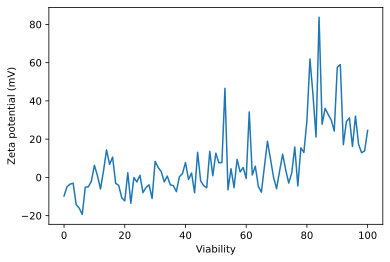

In [7]:
s = {}

for row in df.iloc:
    z_pot = row['Zeta potential (mV)']
    viab = int(row['Viability (%)'])
    if viab not in s:
        s[viab] = []
    s[viab].append(z_pot)

s = np.array([
    sum(s[i]) / len(s[i]) for i in sorted(s.keys())
])

plt.plot(s)
plt.xlabel('Viability')
plt.ylabel('Zeta potential (mV)')

In [8]:
# Делаем вывод, что при повышенном дзета-потенциале НЧ клетка чувствует себя лучше.

<AxesSubplot:xlabel='Concentration μM', ylabel='Viability (%)'>

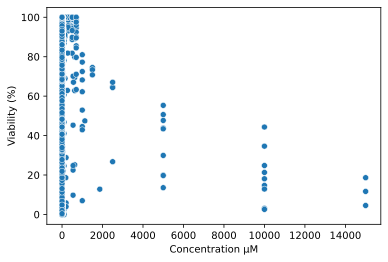

In [9]:
# Рассмотрим зависимость концентрации вещества от жизнеспособности клетки
sns.scatterplot(data=df, x='Concentration μM', y='Viability (%)')

In [10]:
# Рассмотрим менее большой участок
df_ = df.sort_values(by='Concentration μM', ascending=False)[500:]
df_.head()

,Zeta potential (mV),Concentration μM,Viability (%),Animal,Is inorganic,Diameter (nm),Cell line (L)/primary cells (P),Nanoparticle
1190,-8.0,0.05,54.251010,unknown,1,20.0,L,Bi
1267,-8.0,0.05,77.685950,unknown,1,20.0,L,Bi
1203,-8.0,0.05,45.833332,unknown,1,20.0,L,Bi
1581,-8.0,0.05,29.696970,rat,1,5.4,L,QDs
1638,-8.0,0.05,94.425190,unknown,1,37.0,L,QDs


<AxesSubplot:xlabel='Concentration μM', ylabel='Viability (%)'>

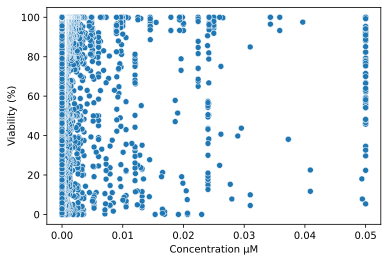

In [11]:
sns.scatterplot(data=df_, x='Concentration μM', y='Viability (%)')

In [12]:
# Чёткой зависимости между концентрацией и жизнеспособностью клеток
# не прослеживается.

# Разве что при очень больших дозах (>= 1000) жизнеспособность
# клетки стремится к нулю.

<AxesSubplot:xlabel='Diameter (nm)', ylabel='Viability (%)'>

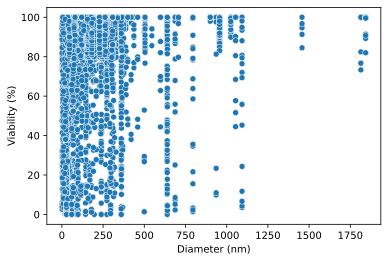

In [13]:
# Посмотрим на то, как диаметр НЧ влияет на жизнеспособность клетки
sns.scatterplot(data=df, x='Diameter (nm)', y='Viability (%)')

In [14]:
# Делаем вывод, что увеличение диаметра НЧ уменьшает её
# вред живой клетке.